### Calculations to determine camera offsets for CACO-03
Based on measurements taken on 2024-11-04 by CRS, Athina, Jin-Si, and Erik

Camera A = c1 is on right looking seaward
Camera B = c2 is on left looking seaward

GPS fix was taken on center hole on bracket.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r = np.sqrt(x**2 + y**2)
    az = np.degrees(np.arctan2(x, y))
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az

def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    x = r * np.sin(np.radians(az))
    y = r * np.cos(np.radians(az))
    return x, y

# quick check of those routines
r, az =  pcoord( -1, -1 )
x, y = xycoord( r, az )
print(r, az)
print(x, y)


1.4142135623730951 225.0
-1.0 -1.0000000000000002


(np.float64(-0.121),
 np.float64(0.121),
 np.float64(-0.0025000000000000005),
 np.float64(0.052500000000000005))

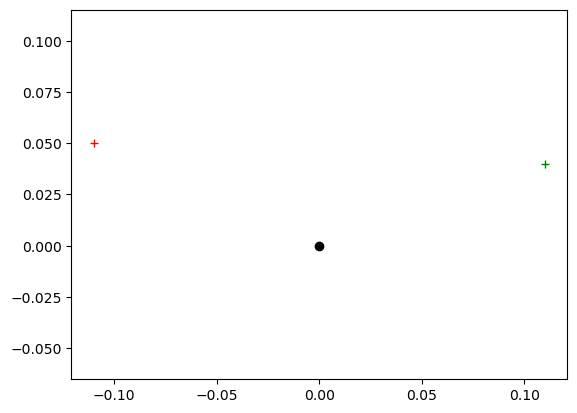

In [2]:
# All measurements are in meters
# In bracket coordinates, camera a offsets are:
ax = 0.11
ay = 0.04
az = 0.09
# camera b offsets are:
bx =-0.11
by = 0.05
bz = 0.09

# Best guess at bracket azimuth is 333 degrees T, so positive x in bracket coords is 333+90-360
rot = 333+90-360
# Plausibe range for azimuth is 320 - 337
rote = 337+90-360
rotw = 320+90-360
# plot of horizontal dims in bracket coords
holex = 0.
holey = 0.

plt.plot(holex, holey, 'ok')
plt.plot(ax, ay, '+g' )
plt.plot(bx, by, '+r' )
plt.axis('equal')

rot = 63
rote = 67
rotw = 50
0.11 90.0 0.11 270.0
0.049938954971350154 -0.09801071766072046 -0.04993895497135017 0.09801071766072046


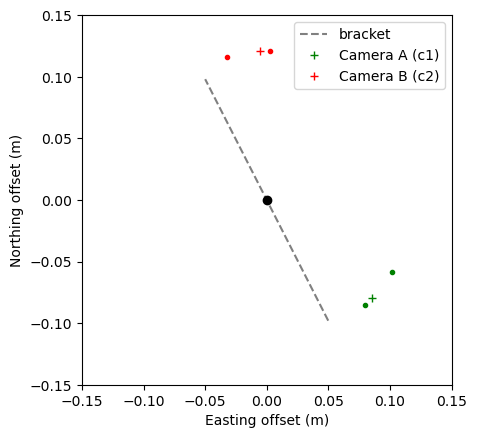

In [3]:
# rotate
print('rot =', rot)
print('rote =', rote)
print('rotw =', rotw)

ar, aaz = pcoord( ax, ay )
br, baz = pcoord( bx, by )
aazr = aaz+rot
aaze = aaz+rote
aazw = aaz+rotw
bazr = baz+rot
baze = baz+rote
bazw = baz+rotw

axr, ayr = xycoord( ar, aazr)
axre, ayre = xycoord( ar, aaze )
axrw, ayrw = xycoord( ar, aazw )
bxr, byr = xycoord( br, bazr)
bxre, byre = xycoord( br, baze )
bxrw, byrw = xycoord( br, bazw )

ar0, aaz0 = pcoord( ax, 0 )
br0, baz0 = pcoord( bx, 0 )
print(ar0, aaz0, br0, baz0)
ax0, ay0 = xycoord( ar0, aaz0+rot )
bx0, by0 = xycoord( br0, baz0+rot )
print(ax0, ay0, bx0, by0)
plt.plot([ax0, bx0],[ay0, by0],'--', color='gray', label='bracket')

plt.plot(holex, holey, 'ok')
plt.plot(axr, ayr, '+g', label='Camera A (c1)' )
plt.plot(axre, ayre, '.g' )
plt.plot(axrw, ayrw, '.g' )

plt.plot(bxr, byr, '+r', label='Camera B (c2)' )
plt.plot(bxre, byre, '.r' )
plt.plot(bxrw, byrw, '.r' )
plt.xlim(-.15, .15)
plt.ylim(-.15, .15)
plt.xlabel('Easting offset (m)')
plt.ylabel('Northing offset (m)')
plt.legend()
axs = plt.gca()
axs.set_aspect('equal', adjustable='box')
plt.savefig('CACO03_diagram_2024-11-04.png', bbox_inches='tight', dpi=200)

In [4]:
print('Camera A')
print('Easting offset :  {:.3f} ({:.3f} - {:.3f})'.format(axr, axrw, axre)) 
print('Northing offset: {:.3f} ({:.3f} - {:.3f})'.format(ayr, ayrw, ayre)) 
print('Camera B')
print('Easting offset: {:.3f} ({:.3f} - {:.3f})'.format(bxr, bxrw, bxre)) 
print('Northing offset: {:.3f} ({:.3f} - {:.3f})'.format(byr, byrw, byre)) 

Camera A
Easting offset :  0.086 (0.101 - 0.080)
Northing offset: -0.080 (-0.059 - -0.086)
Camera B
Easting offset: -0.005 (-0.032 - 0.003)
Northing offset: 0.121 (0.116 - 0.121)


In [5]:
# XY uncertainty
delXY = np.sqrt( 0.02*0.02+0.03*0.03 )
delXYZ = np.sqrt( 0.02*0.02+2*(0.03*0.03))
print(delXY, delXYZ)

0.03605551275463989 0.0469041575982343
